In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bluepy

In [2]:
circ=bluepy.Circuit('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/CircuitConfig')

In [3]:
indegree_ca1 = pd.read_pickle('cylinders_analysis/mosaic//data/other/gen_topo_db/community_database.pkl.in-degree')
outdegree_ca1 =  pd.read_pickle('cylinders_analysis/mosaic//data/other/gen_topo_db/community_database.pkl.out-degree')
degree_ca1 = np.sum([indegree_ca1,outdegree_ca1],axis=0)

Text(0.5, 0, 'Number of connections')

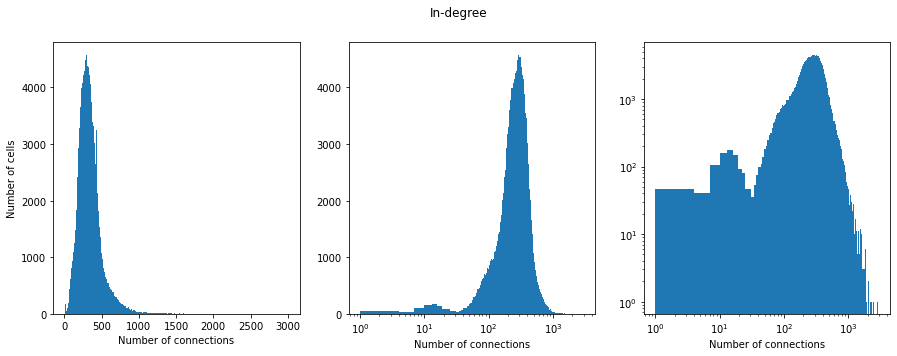

In [44]:
f = plt.figure(figsize=(15,5))
plt.subplot(131)
_=plt.hist(indegree_ca1,bins=1000)
plt.ylabel('Number of cells')
plt.xlabel('Number of connections')
plt.suptitle('In-degree')
plt.subplot(132)
_=plt.hist(indegree_ca1,bins=1000)
plt.xscale("log")
plt.xlabel('Number of connections')
plt.subplot(133)
_=plt.hist(indegree_ca1,bins=1000)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Number of connections')

Text(0.5, 0, 'Number of connections')

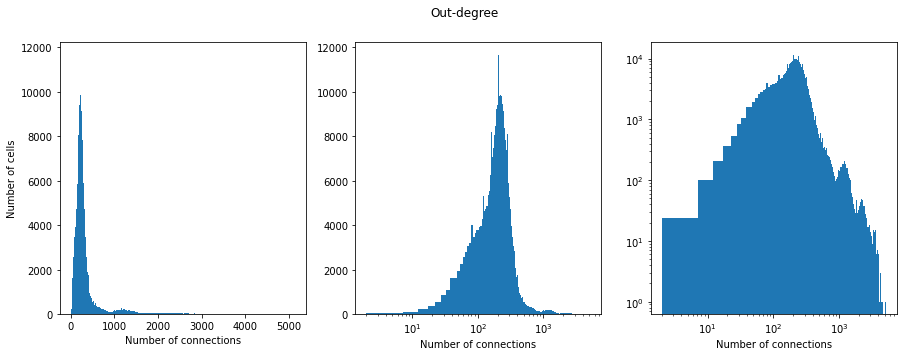

In [45]:
f = plt.figure(figsize=(15,5))
plt.subplot(131)
_=plt.hist(outdegree_ca1,bins=1000)
plt.ylabel('Number of cells')
plt.xlabel('Number of connections')
plt.suptitle('Out-degree')
plt.subplot(132)
_=plt.hist(outdegree_ca1,bins=1000)
plt.xscale("log")
plt.xlabel('Number of connections')
plt.subplot(133)
_=plt.hist(outdegree_ca1,bins=1000)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Number of connections')

Text(0.5, 0, 'Number of connections')

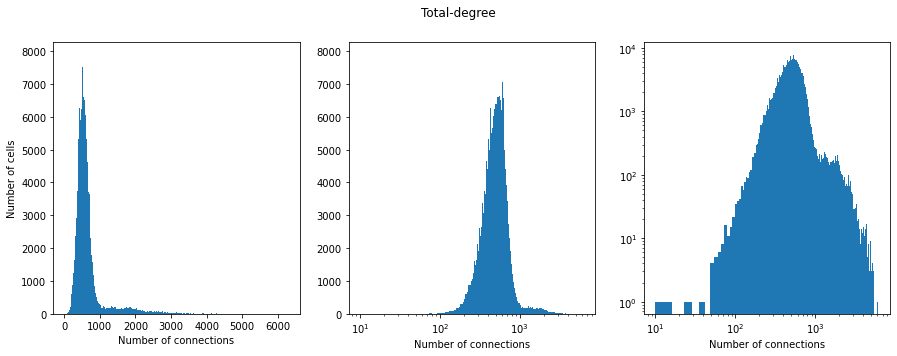

In [46]:
f = plt.figure(figsize=(15,5))
plt.subplot(131)
_=plt.hist(degree_ca1,bins=1000)
plt.ylabel('Number of cells')
plt.xlabel('Number of connections')
plt.suptitle('Total-degree')
plt.subplot(132)
_=plt.hist(degree_ca1,bins=1000)
plt.xscale("log")
plt.xlabel('Number of connections')
plt.subplot(133)
_=plt.hist(degree_ca1,bins=1000)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Number of connections')

Text(0.5, 1.0, 'Cumulative Total-degree as density')

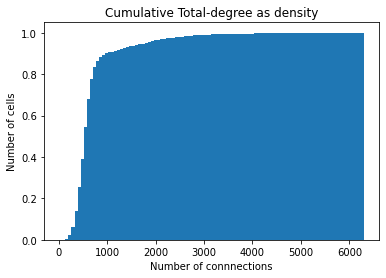

In [47]:
_=plt.hist(degree_ca1,bins=100,density=True,cumulative=True)
plt.ylabel('Number of cells')
plt.xlabel('Number of connnections')
plt.title('Cumulative Total-degree as density')

In [5]:
nrn_info = pd.read_pickle('cylinders_analysis/cylinder300/data/neuron_info.pickle')

In [6]:
nrn_info

,mtype,layer,x,y,z
58,SLM_PPA,SLM,2751.224970,866.287993,4365.508627
78,SLM_PPA,SLM,2638.272777,768.621538,4159.573219
85,SLM_PPA,SLM,2514.319736,718.179560,4074.678973
147,SLM_PPA,SLM,2402.641220,719.695459,4323.480952
160,SLM_PPA,SLM,2610.113997,763.965143,4195.843920
...,...,...,...,...,...
456169,SO_BP,SO,2333.957792,323.090070,4246.094090
456177,SO_BP,SO,2808.330974,387.330625,4502.110465
456215,SO_BP,SO,2642.363377,383.027582,4204.498871
456220,SO_BP,SO,2582.245766,449.801769,4587.116557


In [56]:
indegree_ca1 = pd.read_pickle('/gpfs/bbp.cscs.ch/project/proj112/home/kurban/topo_analysis/ca1-usecase/cylinders_analysis/mosaic/data/other/gen_topo_db/community_database.pkl.in-degree')

In [57]:
indegree_ca1.sort_values('in_degree',inplace=True,ascending=False)

In [58]:
indegree_ca1

,in_degree
452709,3008
450500,2962
450438,2953
453332,2920
453414,2882
...,...
309,1
766,1
284,1
264,1


In [59]:
in_hubs = indegree_ca1[:100]

In [11]:
mtypes_by_gid = np.array(circ.cells.get('Mosaic').mtype.values)

In [61]:
inhub_mtypes = pd.DataFrame(mtypes_by_gid[in_hubs.index.values])

In [62]:
in_hubs['mtype'] = inhub_mtypes.values

/nvme/kurban/288252/ipykernel_29286/3742212415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_hubs['mtype'] = inhub_mtypes.values


In [63]:
in_hubs

,in_degree,mtype
452709,3008,SO_OLM
450500,2962,SO_OLM
450438,2953,SO_OLM
453332,2920,SO_OLM
453414,2882,SO_OLM
...,...,...
453374,2379,SO_OLM
452972,2369,SO_OLM
453439,2368,SO_OLM
451490,2366,SO_OLM


In [53]:
in_hubs.to_csv('in_hubs100_ca1.csv')

In [49]:
np.unique(in_hubs.mtype)

array(['SO_OLM'], dtype=object)

In [64]:
df_degrees = pd.DataFrame(degree_ca1,columns=['degree']).sort_values('degree',ascending=False)

In [65]:
hubs_ca1_100 = df_degrees[:100]

In [66]:
hubs_ca1_100['mtype'] = mtypes_by_gid[hubs_ca1_100.index.values]

/nvme/kurban/288252/ipykernel_29286/1570180900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hubs_ca1_100['mtype'] = mtypes_by_gid[hubs_ca1_100.index.values]


In [67]:
hubs_ca1_100

,degree,mtype
428765,6296,SP_BS
429434,6032,SP_BS
428091,6006,SP_BS
429394,5997,SP_BS
429292,5992,SP_BS
...,...,...
426577,5353,SP_BS
428471,5349,SP_BS
427333,5348,SP_BS
427328,5345,SP_BS


In [68]:
np.unique(hubs_ca1_100.mtype)

array(['SP_BS'], dtype=object)

In [54]:
hubs_ca1_100.to_csv('hubs100_ca1.csv')

In [69]:
out_hubs = outdegree_ca1.sort_values('out_degree',ascending=False)[:100]
out_hubs['mtype'] = mtypes_by_gid[out_hubs.index.values]

In [70]:
out_hubs

,out_degree,mtype
428766,5130,SP_BS
428092,5060,SP_BS
427109,5038,SP_BS
426705,5023,SP_BS
428878,4956,SP_BS
...,...,...
427517,4450,SP_BS
429148,4449,SP_BS
428604,4448,SP_BS
427928,4448,SP_BS


In [43]:
out_hubs.to_csv('out_hubs100_ca1.csv')

# Analyze

In [54]:
indegree_ca1 = pd.read_pickle('cylinders_analysis/mosaic//data/other/gen_topo_db/community_database.pkl.in-degree')
outdegree_ca1 = pd.read_pickle('cylinders_analysis/mosaic//data/other/gen_topo_db/community_database.pkl.out-degree')
mtypes_by_gid = np.array(circ.cells.get('Mosaic').mtype.values)

In [85]:
indegree_ca1['mtype'] = mtypes_by_gid[indegree_ca1.index.values-1] # dont use pandas for creting new column.
outdegree_ca1['mtype'] = mtypes_by_gid[outdegree_ca1.index.values-1] # dont use pandas for creting new column.

In [87]:
indegree_ca1

,conns,syns,mtype
1,8,42,SLM_PPA
2,14,87,SLM_PPA
3,27,106,SLM_PPA
4,10,68,SLM_PPA
5,26,161,SLM_PPA
...,...,...,...
456374,701,4774,SO_BP
456375,749,3476,SO_BP
456376,597,3577,SO_BP
456377,802,5274,SO_BP


In [40]:
from scipy import sparse

In [41]:
adj_ca1 = sparse.load_npz('/gpfs/bbp.cscs.ch/project/proj112/home/kurban/topo_analysis/ca1-usecase/cylinders_analysis/mosaic/data/connectivity.npz')

In [45]:
np.count_nonzero(adj_ca1[:,0].todense())

8

In [56]:
indegree_ca1['syns'] = -1

In [91]:
outdegree_ca1['syns'] = -1

In [74]:
def get_aff_syns(gid):
    num_aff_syns =  len(circ.connectome.afferent_synapses(gid))
    indegree_ca1.loc[gid].indegree_syns = num_aff_syns

In [112]:
def get_eff_syns(gid):
    num_eff_syns =  len(circ.connectome.efferent_synapses(gid))
    outdegree_ca1.loc[gid,'syns'] = num_eff_syns

In [77]:
_ = indegree_ca1.index.map(get_aff_syns)

In [113]:
_ = outdegree_ca1.index.map(get_eff_syns)

In [118]:
outdegree_ca1.columns = ['conns','syns']

In [80]:
indegree_ca1.columns = ['conns','syns']

In [88]:
#indegree_ca1.to_csv('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/indegree_CA1.csv')

In [122]:
#outdegree_ca1.to_csv('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/data/outdegree_CA1.csv')

In [16]:
indegree_ca1.in_degree.sum() == outdegree_ca1.out_degree.sum()

True

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Post m-types')

<Figure size 720x360 with 0 Axes>

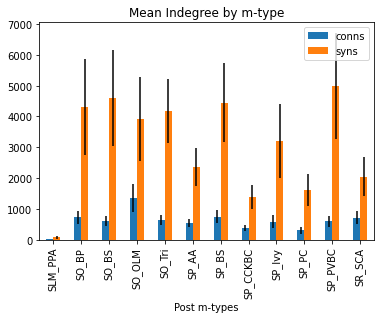

In [123]:
plt.figure(figsize=(10,5))
mt_groupby_in= indegree_ca1.groupby('mtype').mean()
mt_groupby_in.plot.bar(yerr=indegree_ca1.groupby('mtype').std())
plt.title('Mean Indegree by m-type')
plt.xlabel('Post m-types')

Text(0.5, 0, 'Pre m-types')

<Figure size 720x360 with 0 Axes>

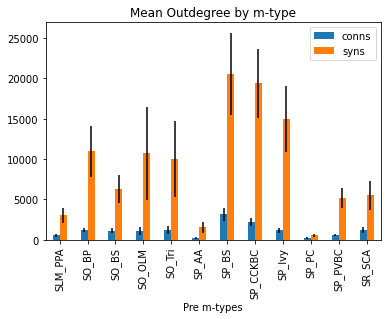

In [124]:
plt.figure(figsize=(10,5))
mt_groupby_out = outdegree_ca1.groupby('mtype').mean()
mt_groupby_out.plot.bar(yerr=outdegree_ca1.groupby('mtype').std())
plt.title('Mean Outdegree by m-type')
plt.xlabel('Pre m-types')

In [22]:
mt_groupby_in['indegree_std']=indegree_ca1.groupby('mtype').std()
mt_groupby_out['outdegree_std']=outdegree_ca1.groupby('mtype').std()

In [23]:
mt_groupby_in

,in_degree,indegree_std
mtype,,
SLM_PPA,15.385863,6.648143
SO_BP,720.119792,197.951853
SO_BS,608.020747,171.000093
SO_OLM,1341.899849,453.267584
SO_Tri,645.166199,156.822706
SP_AA,547.766014,134.049568
SP_BS,750.067383,216.415689
SP_CCKBC,383.424499,101.613305
SP_Ivy,581.607557,208.526890


In [24]:
mt_groupby_inout = pd.concat([mt_groupby_in,mt_groupby_out],axis=1)

In [25]:
mt_groupby_inout

,in_degree,indegree_std,out_degree,outdegree_std
mtype,,,,
SLM_PPA,15.385863,6.648143,531.698725,162.714095
SO_BP,720.119792,197.951853,1197.041667,305.144426
SO_BS,608.020747,171.000093,1093.424274,298.590169
SO_OLM,1341.899849,453.267584,1017.723379,494.170310
SO_Tri,645.166199,156.822706,1196.368163,440.744432
SP_AA,547.766014,134.049568,211.758452,85.145985
SP_BS,750.067383,216.415689,3144.117630,798.873521
SP_CCKBC,383.424499,101.613305,2209.961473,457.682321
SP_Ivy,581.607557,208.526890,1146.338734,290.294554


In [26]:
mt_groupby_inout.columns = ['indegree_mean','indegree_std','outdegree_mean','outdegree_std']

In [27]:
mt_groupby_inout

,indegree_mean,indegree_std,outdegree_mean,outdegree_std
mtype,,,,
SLM_PPA,15.385863,6.648143,531.698725,162.714095
SO_BP,720.119792,197.951853,1197.041667,305.144426
SO_BS,608.020747,171.000093,1093.424274,298.590169
SO_OLM,1341.899849,453.267584,1017.723379,494.170310
SO_Tri,645.166199,156.822706,1196.368163,440.744432
SP_AA,547.766014,134.049568,211.758452,85.145985
SP_BS,750.067383,216.415689,3144.117630,798.873521
SP_CCKBC,383.424499,101.613305,2209.961473,457.682321
SP_Ivy,581.607557,208.526890,1146.338734,290.294554


In [28]:
mt_groupby_inout.to_csv('/gpfs/bbp.cscs.ch/project/proj112/circuits/CA1/20211110-BioM/validation/in_out_degree_conns.csv')

# connection matrix

In [4]:
import scipy
import matplotlib.pyplot as plt

In [ ]:
conn_ca1 = np.array(1*scipy.sparse.load_npz('cylinders_analysis/mosaic/data/connectivity.npz').todense())

In [5]:
conn_ca1 = scipy.sparse.load_npz('cylinders_analysis/mosaic/data/connectivity.npz')

In [6]:
scipy.sparse.isspmatrix_csc(conn_ca1)

True

In [7]:
mtypes_by_gid = np.array(circ.cells.get('Mosaic').mtype.values)

In [8]:
mtypes_df = pd.DataFrame(mtypes_by_gid,columns=['mtype'])

In [9]:
df2 = mtypes_df.sort_values('mtype') # 
df2.head()

,mtype
0,SLM_PPA
569,SLM_PPA
570,SLM_PPA
571,SLM_PPA
572,SLM_PPA


In [10]:
reindex_list = df2.index.values

In [11]:
df2.groupby('mtype').size()

mtype
SLM_PPA        863
SO_BP          384
SO_BS          964
SO_OLM        3315
SO_Tri        1426
SP_AA         2248
SP_BS         3443
SP_CCKBC      7086
SP_Ivy       18023
SP_PC       406666
SP_PVBC      11152
SR_SCA         808
dtype: int64

In [12]:
conn_ca1_reindexed = conn_ca1[reindex_list]

In [13]:
cumsum_mtypes_indices = np.hstack([0,np.cumsum(df2.groupby('mtype').size().values)]) # after ordering, to index mtypes, get the list of indices for start point of each mtype

In [14]:
cumsum_mtypes_indices

array([     0,    863,   1247,   2211,   5526,   6952,   9200,  12643,
        19729,  37752, 444418, 455570, 456378])

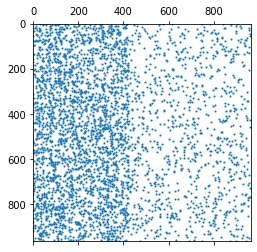

In [15]:
plt.spy(conn_ca1_reindexed[1247:2211,1247:2211],markersize=1)

Text(0.5, 0.98, 'Intra-mtype connectivity')

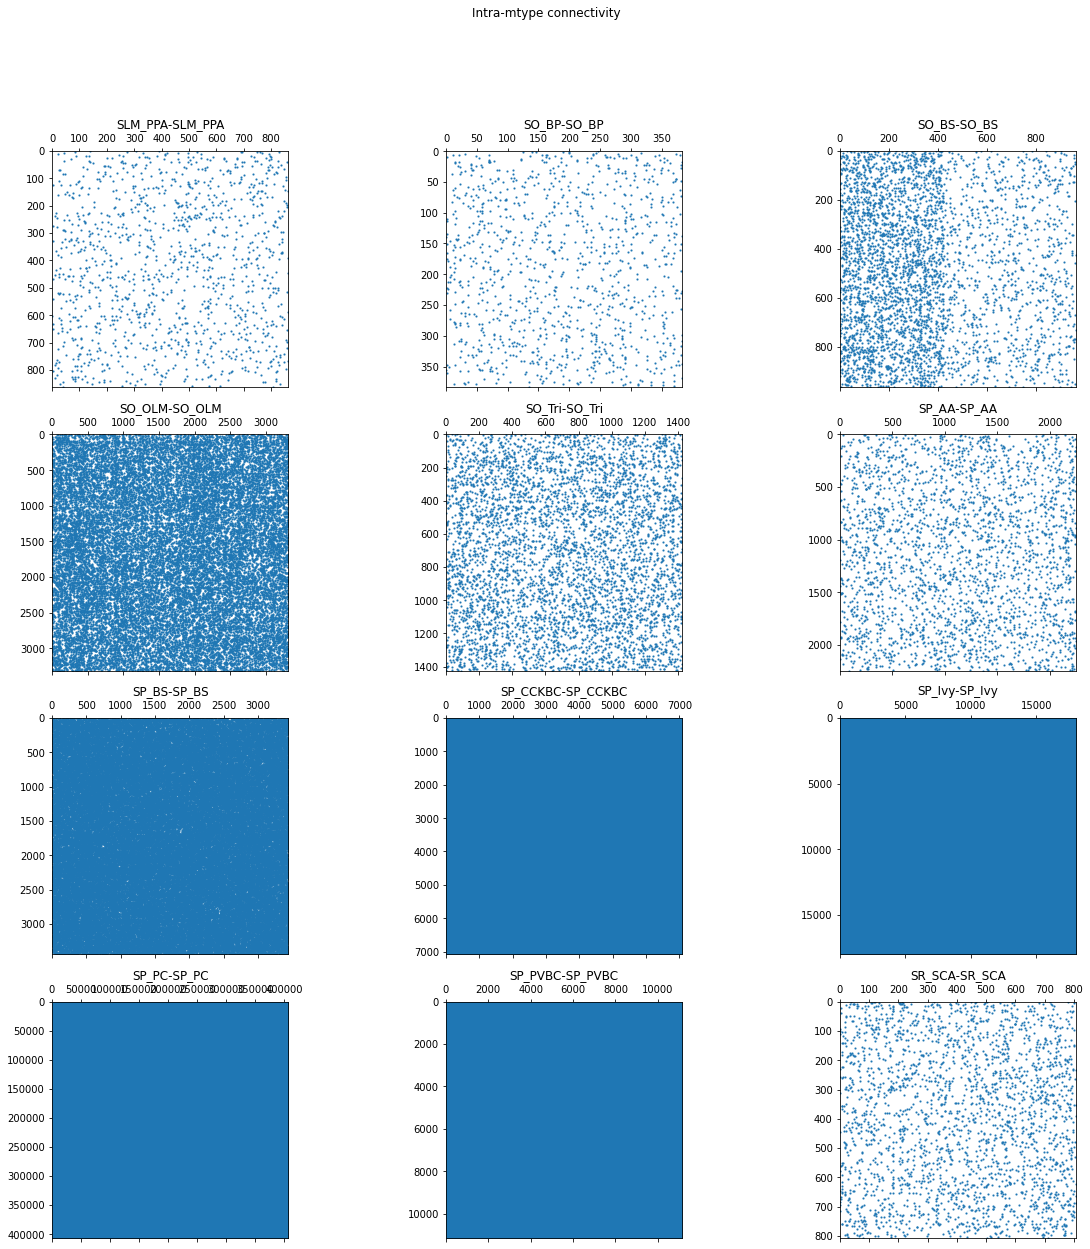

In [143]:
f = plt.figure(figsize=(20,20))
for i in range(len(cumsum_mtypes_indices)-1):
    plt.subplot(4,3,i+1)
    cur_mtype =  np.unique(mtypes_by_gid)[i]
    plt.title(f'{cur_mtype}-{cur_mtype}')
    if cur_mtype == 'SP_PC':
        plt.spy(conn_ca1_reindexed[cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1],cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1]],markersize=1)
    else:
        plt.spy(conn_ca1_reindexed[cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1],cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1]],markersize=1)
        
plt.suptitle('Intra-mtype connectivity')

In [16]:
import scipy.sparse.linalg as ssl

Text(0.5, 0.98, 'Intra-mtype connectivity')

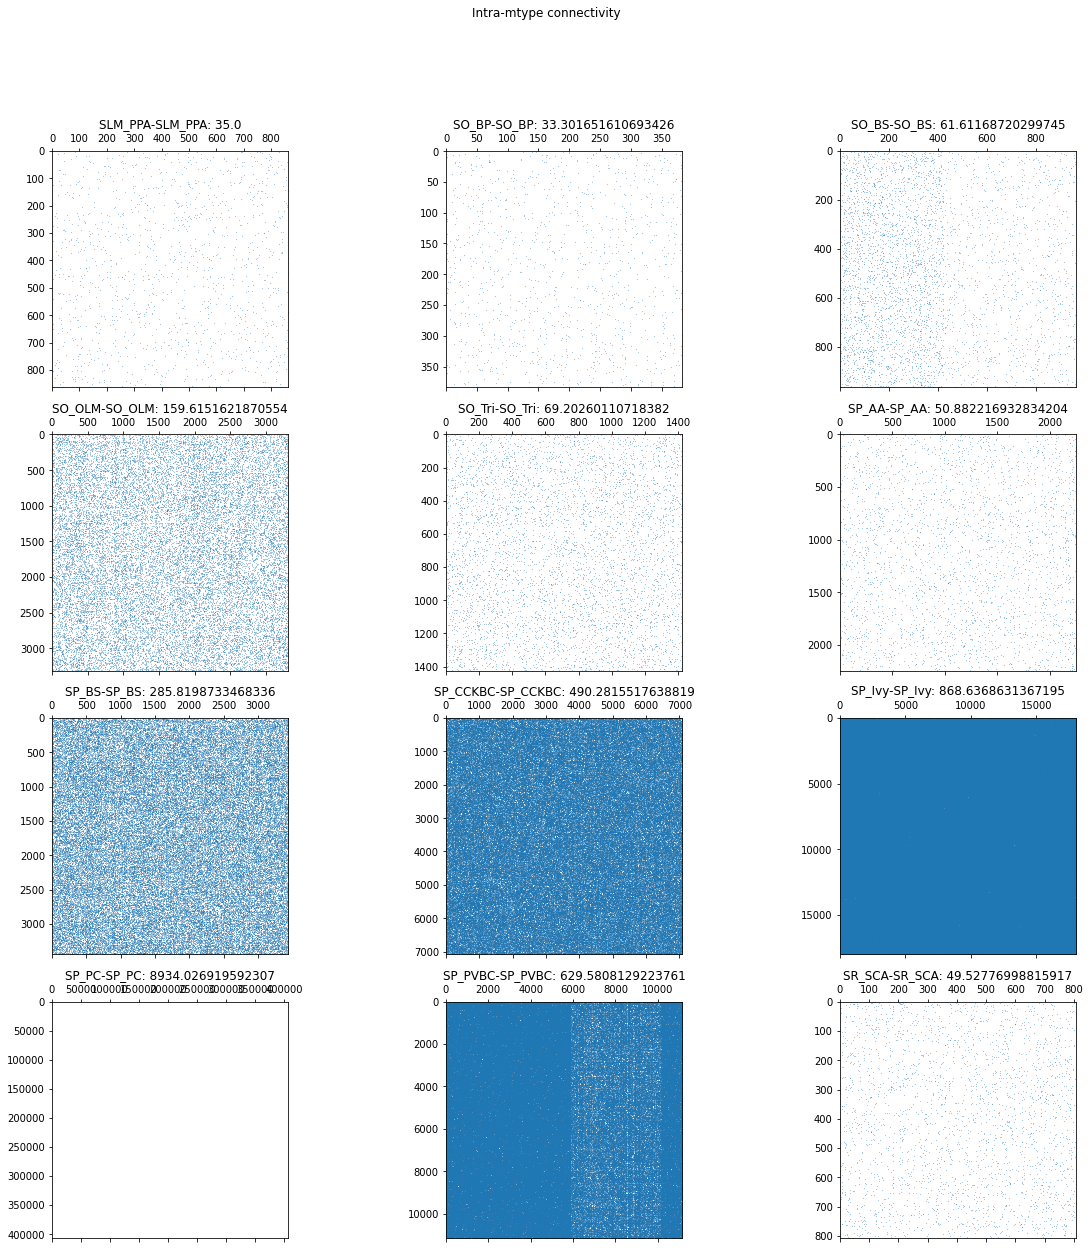

In [199]:
#TODO: normalize by sparsity
f = plt.figure(figsize=(20,20))
for i in range(len(cumsum_mtypes_indices)-1):
    plt.subplot(4,3,i+1)
    cur_mtype =  np.unique(mtypes_by_gid)[i]
    cur_m = conn_ca1_reindexed[cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1],cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1]]
    plt.title(f'{cur_mtype}-{cur_mtype}: {ssl.norm(cur_m)}')
    if cur_mtype == 'SP_PC':
        plt.spy(cur_m,markersize=0.001)
    else:
        plt.spy(cur_m,markersize=0.1)
        
plt.suptitle('Intra-mtype connectivity')

In [55]:
np.exp(-49/1000)

0.9521811296985049

In [56]:
asd = conn_ca1_reindexed[cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1],cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1]]

NameError: name 'i' is not defined

In [197]:
ssl.norm(asd)

49.52776998815917

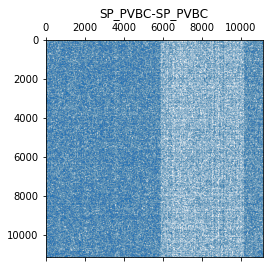

In [57]:
f = plt.figure()
for i in range(len(cumsum_mtypes_indices)-1):
    cur_mtype =  np.unique(mtypes_by_gid)[i]
    if cur_mtype == 'SP_PVBC':
        plt.title(f'{cur_mtype}-{cur_mtype}')
        markersize = 1/50
        plt.spy(conn_ca1_reindexed[cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1],cumsum_mtypes_indices[i]:cumsum_mtypes_indices[i+1]],markersize=markersize)
 

In [58]:
mt_dict = {}
for idx,mt in enumerate(np.unique(mtypes_by_gid)):
    mt_dict[mt] = [cumsum_mtypes_indices[idx],cumsum_mtypes_indices[idx+1]]

In [220]:
pd.DataFrame(mt_dict).to_csv('sorted_mtype_cumsum.csv')

In [18]:
mt_dict = pd.read_csv('sorted_mtype_cumsum.csv',index_col=0)
mt_dict

,SLM_PPA,SO_BP,SO_BS,SO_OLM,SO_Tri,SP_AA,SP_BS,SP_CCKBC,SP_Ivy,SP_PC,SP_PVBC,SR_SCA
0,0,863,1247,2211,5526,6952,9200,12643,19729,37752,444418,455570
1,863,1247,2211,5526,6952,9200,12643,19729,37752,444418,455570,456378


In [24]:
def get_matrix(mt1,mt2,markersize=1/50,**kwargs):
    f = plt.figure(**kwargs)
    if mt1=='Mosaic':
        cur_m = conn_ca1_reindexed[:,mt_dict[mt2][0]:mt_dict[mt2][1]]
    elif mt2=='Mosaic':
        cur_m = conn_ca1_reindexed[mt_dict[mt1][0]:mt_dict[mt1][1],:]
    elif mt1=='Mosaic' and mt2=='Mosaic':
        pass
    else:
        cur_m = conn_ca1_reindexed[mt_dict[mt1][0]:mt_dict[mt1][1],mt_dict[mt2][0]:mt_dict[mt2][1]]
        print(f'{mt1}: {mt_dict[mt1][0]}:{mt_dict[mt1][1]},\n{mt2}: {mt_dict[mt2][0]}:{mt_dict[mt2][1]}')
    plt.spy(cur_m,markersize=markersize)
    plt.title(f'{mt1}-{mt2}')
    return f, cur_m


In [20]:
mt1 = mt2 = 'SP_PVBC'
print(mt_dict[mt1][0],mt_dict[mt1][1],'\n',mt_dict[mt2][0],mt_dict[mt2][1])

444418 455570 
 444418 455570


In [21]:
def get_range():
    pass

def test_mtype_is_unique(mt1):
    print(np.unique(mtypes_by_gid[reindex_list[mt_dict[mt1][0]:mt_dict[mt1][1]]]))
    assert len(np.unique(mtypes_by_gid[reindex_list[mt_dict[mt1][0]:mt_dict[mt1][1]]])) == 1

In [22]:
test_mtype_is_unique('SP_PVBC')

['SP_PVBC']


SP_PVBC: 444418:455570,
SP_PVBC: 444418:455570


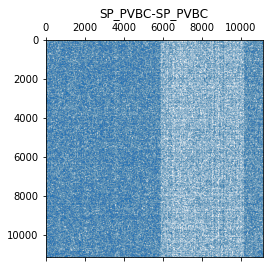

In [35]:
_,cur_matrix = get_matrix('SP_PVBC','SP_PVBC')

In [36]:
cur_matrix.count_nonzero() / (cur_matrix.shape[0]*cur_matrix.shape[1])

0.0031871128879868427

SR_SCA: 455570:456378,
SO_BS: 1247:2211


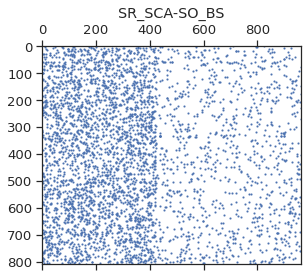

In [155]:
_,cur_matrix =get_matrix('SR_SCA','SO_BS',markersize=1)

SP_Ivy: 19729:37752,
SP_Ivy: 19729:37752


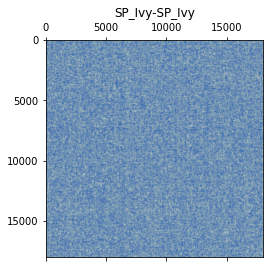

In [217]:
_ = get_matrix('SP_Ivy','SP_Ivy',markersize=np.exp(-868/170))

In [82]:
np.exp(-868/170)

0.006060988623948935

In [66]:
indegree_ca1

,in_degree,mtype
1,8,SLM_PPA
2,14,SLM_PPA
3,27,SLM_PPA
4,10,SLM_PPA
5,26,SLM_PPA
...,...,...
456374,701,SO_BP
456375,749,SO_BP
456376,597,SO_BP
456377,802,SO_BP


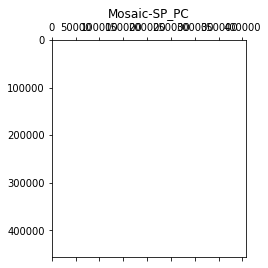

In [84]:
_ = get_matrix('Mosaic','SP_PC',markersize=1e-4)

In [85]:
conn_ca1_reindexed

<456378x456378 sparse matrix of type '<class 'numpy.bool_'>'
	with 156661043 stored elements in Compressed Sparse Column format>

In [92]:
mtypes = sorted(circ.cells.mtypes)

In [97]:
mtypes[0]

'SLM_PPA'

In [95]:
asd = list(circ.connectome.iter_connections(mtypes[0],mtypes[0]))

In [96]:
len(asd)

1225

In [99]:
asd[:5]

[(90, 1), (237, 3), (844, 4), (107, 5), (119, 5)]

In [104]:
np.unique(circ.cells.get([asd[i][0] for i in range(len(asd))]).mtype)

array(['SLM_PPA'], dtype=object)

In [105]:
df = pd.DataFrame(index=mtypes,columns=mtypes)
df

,SLM_PPA,SO_BP,SO_BS,SO_OLM,SO_Tri,SP_AA,SP_BS,SP_CCKBC,SP_Ivy,SP_PC,SP_PVBC,SR_SCA
SLM_PPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO_BP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO_BS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO_OLM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SO_Tri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_BS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_CCKBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_Ivy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df = pd.DataFrame(index=mtypes,columns=mtypes)
for i in mtypes:
    print('\n')
    print(i,end=' ')
    for j in mtypes:
        df.loc[i][j] =  len(list(circ.connectome.iter_connections(i,j)))
        print('.',end='.')
    



SLM_PPA ........................

SO_BP ........................

SO_BS ........................

SO_OLM ........................

SO_Tri ........................

SP_AA ........................

SP_BS ........................

SP_CCKBC ........................

SP_Ivy ........................

SP_PC ........................

SP_PVBC ........................

SR_SCA ........................

In [118]:
df.to_csv('iterconnections_matrix_mtype.csv')

In [260]:
synapses = pd.DataFrame(index=mtypes,columns=mtypes)
for i in mtypes:
    print('\n')
    print(i,end=' ')
    for j in mtypes:
        synapses.loc[i][j] =  len(list(circ.connectome.pathway_synapses(i,j)))
        print('.',end='.')



SLM_PPA ........................

SO_BP ........................

SO_BS ........................

SO_OLM ........................

SO_Tri ........................

SP_AA ........................

SP_BS ........................

SP_CCKBC ........................

SP_Ivy ........................

SP_PC ........................

SP_PVBC ........................

SR_SCA ........................

In [261]:
synapses.to_csv('synapses_matrix_mtype.csv')

In [ ]:
!pwd

In [263]:
synapses2 = pd.read_csv('synapses_matrix_mtype.csv',index_col=0)
synapses2

,SLM_PPA,SO_BP,SO_BS,SO_OLM,SO_Tri,SP_AA,SP_BS,SP_CCKBC,SP_Ivy,SP_PC,SP_PVBC,SR_SCA
SLM_PPA,5263,152,0,0,101,10296,1041,37011,8545,2486331,53288,756
SO_BP,685,1638,4261,12540,6705,16442,47277,31207,186476,3697257,188584,7237
SO_BS,383,4693,5859,26973,12904,18636,77078,58232,257925,5300586,273114,7132
SO_OLM,51594,868,629,2327,1699,65003,12373,336231,96682,34345258,487845,9261
SO_Tri,169,10718,28202,135008,40843,44143,156086,76860,506854,12692353,522082,10217
SP_AA,0,0,0,0,0,0,0,0,0,3430665,0,0
SP_BS,755,33014,49752,186754,149911,195622,923245,386599,2852329,63256249,2643320,57601
SP_CCKBC,434,51389,50366,173322,196331,211776,1421797,454375,3516866,127218695,3840617,73949
SP_Ivy,837,100426,81489,271943,437949,501679,2747816,1193450,8006543,246864116,9252684,169307
SP_PC,0,1407483,4179918,12050560,4960154,4058889,8871478,6761009,39910930,96143313,35655331,1238395


In [203]:
df = pd.read_csv('iterconnections_matrix_mtype.csv',index_col=0)

In [204]:
#!cp iterconnections_matrix_mtype.csv num_cells_per_mtype.csv /gpfs/bbp.cscs.ch/project/proj112/home/kurban/hippdiss-198

In [205]:
df

,SLM_PPA,SO_BP,SO_BS,SO_OLM,SO_Tri,SP_AA,SP_BS,SP_CCKBC,SP_Ivy,SP_PC,SP_PVBC,SR_SCA
SLM_PPA,1225,88,0,0,74,2555,773,10252,6006,422103,15199,581
SO_BP,457,1134,1400,5597,2402,4596,10964,11674,46942,338965,33275,2258
SO_BS,308,2895,4223,16121,7359,10798,22821,35200,79767,795585,73807,5177
SO_OLM,8729,678,531,1964,1307,15811,9442,73467,62449,3071369,121755,6251
SO_Tri,140,3461,8429,28402,11273,13860,31400,44639,141752,1315872,99372,7421
SP_AA,0,0,0,0,0,0,0,0,0,476033,0,0
SP_BS,609,10336,16258,58426,32327,49623,112441,123175,462918,9606455,333472,19157
SP_CCKBC,339,15046,14326,49453,55981,68907,183479,175340,710930,13790284,565966,29736
SP_Ivy,642,29639,29729,124206,103414,135712,368876,357824,1329319,17058538,1064159,58405
SP_PC,0,186379,485824,4073914,646741,809880,1582505,1568538,6780666,74379351,3495197,397203


In [206]:
import seaborn as sns
from matplotlib.colors import SymLogNorm

In [127]:
df['mean_outdegree'] = df.mean(axis=1)

SLM_PPA     3.823800e+04
SO_BP       3.830533e+04
SO_BS       8.783842e+04
SO_OLM      2.811461e+05
SO_Tri      1.421684e+05
SP_AA       3.966942e+04
SP_BS       9.020998e+05
SP_CCKBC    1.304982e+06
SP_Ivy      1.721705e+06
SP_PC       7.867183e+06
SP_PVBC     5.487192e+05
SR_SCA      8.303167e+04
dtype: float64

In [135]:
num_cells_per_mtype = {}
for i in mtypes:
    num_cells_per_mtype[i] = len(circ.cells.get(i))

In [144]:
num_cells_per_mtype = pd.DataFrame(num_cells_per_mtype.values(),index=num_cells_per_mtype.keys(),columns=['Count'])
num_cells_per_mtype

,Count
SLM_PPA,863
SO_BP,384
SO_BS,964
SO_OLM,3315
SO_Tri,1426
SP_AA,2248
SP_BS,3443
SP_CCKBC,7086
SP_Ivy,18023
SP_PC,406666


In [152]:
conns_normalized_by_cols = pd.DataFrame(df.values/num_cells_per_mtype.values,index=mtypes,columns=mtypes) # indegree, divided by post_cell_types
conns_normalized_by_cols

,SLM_PPA,SO_BP,SO_BS,SO_OLM,SO_Tri,SP_AA,SP_BS,SP_CCKBC,SP_Ivy,SP_PC,SP_PVBC,SR_SCA
SLM_PPA,1.419467,0.10197,0.0,0.0,0.085747,2.960603,0.895713,11.87949,6.959444,489.11124,17.611819,0.673233
SO_BP,1.190104,2.953125,3.645833,14.575521,6.255208,11.96875,28.552083,30.401042,122.244792,882.721354,86.653646,5.880208
SO_BS,0.319502,3.003112,4.380705,16.723029,7.633817,11.201245,23.673237,36.514523,82.745851,825.295643,76.563278,5.370332
SO_OLM,2.633183,0.204525,0.160181,0.592459,0.394268,4.769532,2.848265,22.161991,18.838311,926.506486,36.728507,1.885671
SO_Tri,0.098177,2.427069,5.91094,19.917251,7.90533,9.719495,22.019635,31.303647,99.40533,922.771388,69.685835,5.204067
SP_AA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.758452,0.0,0.0
SP_BS,0.176881,3.002033,4.722045,16.969503,9.389195,14.412721,32.657857,35.775486,134.451931,2790.140866,96.855068,5.564043
SP_CCKBC,0.047841,2.123342,2.021733,6.978973,7.900226,9.724386,25.89317,24.744567,100.328817,1946.130962,79.871013,4.196444
SP_Ivy,0.035621,1.64451,1.649503,6.891527,5.73789,7.529934,20.466959,19.853742,73.756811,946.487155,59.044499,3.240581
SP_PC,0.0,0.45831,1.194651,10.017838,1.590349,1.991511,3.891412,3.857067,16.673796,182.900343,8.594761,0.97673


In [173]:
conns_normalized_by_cols.mean(axis=1) # for columns

SLM_PPA      44.308227
SO_BP        99.753472
SO_BS        91.118689
SO_OLM       84.810282
SO_Tri       99.697347
SP_AA        17.646538
SP_BS       262.009802
SP_CCKBC    184.163456
SP_Ivy       95.528228
SP_PC        19.345564
SP_PVBC      49.203656
SR_SCA      102.761964
dtype: float64

In [175]:
conns_normalized_by_cols.std(axis=1) # for columns

SLM_PPA     140.189146
SO_BP       249.441712
SO_BS       232.887919
SO_OLM      265.319328
SO_Tri      260.952138
SP_AA        61.129400
SP_BS       797.242247
SP_CCKBC    555.827922
SP_Ivy      269.042521
SP_PC        51.744894
SP_PVBC     105.799977
SR_SCA      272.800375
dtype: float64

In [183]:
df

,Unnamed: 0,SLM_PPA,SO_BP,SO_BS,SO_OLM,SO_Tri,SP_AA,SP_BS,SP_CCKBC,SP_Ivy,SP_PC,SP_PVBC,SR_SCA
0,SLM_PPA,1225,88,0,0,74,2555,773,10252,6006,422103,15199,581
1,SO_BP,457,1134,1400,5597,2402,4596,10964,11674,46942,338965,33275,2258
2,SO_BS,308,2895,4223,16121,7359,10798,22821,35200,79767,795585,73807,5177
3,SO_OLM,8729,678,531,1964,1307,15811,9442,73467,62449,3071369,121755,6251
4,SO_Tri,140,3461,8429,28402,11273,13860,31400,44639,141752,1315872,99372,7421
5,SP_AA,0,0,0,0,0,0,0,0,0,476033,0,0
6,SP_BS,609,10336,16258,58426,32327,49623,112441,123175,462918,9606455,333472,19157
7,SP_CCKBC,339,15046,14326,49453,55981,68907,183479,175340,710930,13790284,565966,29736
8,SP_Ivy,642,29639,29729,124206,103414,135712,368876,357824,1329319,17058538,1064159,58405
9,SP_PC,0,186379,485824,4073914,646741,809880,1582505,1568538,6780666,74379351,3495197,397203


In [195]:
conns_normalized_by_rows = pd.DataFrame(df.values/num_cells_per_mtype.values,index=mtypes,columns=mtypes) # outdegree, divided by pre_cell_types
conns_normalized_by_rows

TypeError: 'numpy.ndarray' object is not callable

In [171]:
num_cells_per_mtype.to_csv('num_cells_per_mtype.csv')

In [199]:
df

,Unnamed: 0,SLM_PPA,SO_BP,SO_BS,SO_OLM,SO_Tri,SP_AA,SP_BS,SP_CCKBC,SP_Ivy,SP_PC,SP_PVBC,SR_SCA
0,SLM_PPA,1225,88,0,0,74,2555,773,10252,6006,422103,15199,581
1,SO_BP,457,1134,1400,5597,2402,4596,10964,11674,46942,338965,33275,2258
2,SO_BS,308,2895,4223,16121,7359,10798,22821,35200,79767,795585,73807,5177
3,SO_OLM,8729,678,531,1964,1307,15811,9442,73467,62449,3071369,121755,6251
4,SO_Tri,140,3461,8429,28402,11273,13860,31400,44639,141752,1315872,99372,7421
5,SP_AA,0,0,0,0,0,0,0,0,0,476033,0,0
6,SP_BS,609,10336,16258,58426,32327,49623,112441,123175,462918,9606455,333472,19157
7,SP_CCKBC,339,15046,14326,49453,55981,68907,183479,175340,710930,13790284,565966,29736
8,SP_Ivy,642,29639,29729,124206,103414,135712,368876,357824,1329319,17058538,1064159,58405
9,SP_PC,0,186379,485824,4073914,646741,809880,1582505,1568538,6780666,74379351,3495197,397203
